In [1]:
pip install wordcloud

In [2]:
pip install gensim

# **Import**

In [3]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_preprocessed.xlsx')
dataset.head()

Unnamed: 0.1  Unnamed: 0                             id_review  \
0             0           0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1             1           1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2             2           2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3             3           5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4             4           6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   

                                  review_clean_cased  \
0  Suka Bali area keluarga yang luar biasa x D me...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2  Lokasi paling pas liat sunrise harus datang se...   
3  Tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                  review_low_uncased  \
0  suka bali area keluarga yang luar biasa x d me...   
1  saya selalu berjalan di pantai sanur pada hari...   
2  lokasi paling pas liat sunrise harus datang se...   
3  tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                              review attractions amenities  \
0  Suka Bali - area keluarga yang luar biasa_x000...        none      none   
1  Saya selalu berjalan di Pantai Sanur pada hari...     positif    netral   
2  Lokasi paling pas liat sunrise..harus datang s...     positif      none   
3  Tempatnya bagus, selalu ramai oleh pengunjung....     positif      none   
4  pantai sanur banyak menyimpan misteri dan sang...     positif      none   

  access    price  ...                                     amenities_text  \
0   none     none  ...                                               none   
1   none     none  ...  Setelah Anda berjalan anda dapat menikmati hid...   
2   none  positif  ...                                               none   
3   none     none  ...                                               none   
4   none     none  ...                                               none   

  access_text                                         price_text  \
0        none                                               none   
1        none                                               none   
2        none  Lokasi paling pas liat sunrise..harus datang s...   
3        none                                               none   
4        none                                               none   

                                      no_aspect_text  \
0  Suka Bali - area keluarga yang luar biasa menc...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2                                               none   
3                                               none   
4                                               none   

                            cleaned_text_attractions  \
0                                               none   
1  lari tonton matahari terbit indah jalan inna g...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                              cleaned_text_amenities cleaned_text_access  \
0                                               none                none   
1  jalan nikmat hidang lokal jalan nikmat hidang ...                none   
2                                               none                none   
3                                               none                none   
4                                               none                none   

                                  cleaned_text_price  \
0                                               none   
1                                               none   
2  lokasi pas liat sunrise jam santai bayar parki...   
3                                               none   
4                                               none   

                              cleaned_text_no_aspect  \
0  suka bal area keluarga cinta jalan bal tawar a

# **Aspek Access**

### **Text Negatif**

In [7]:
# Mengambil selain "none" dan mengambil "negatif"
df_access = dataset[(dataset['access'] != 'none') & ((dataset['access'] == 'negatif'))]

df_access_negative = df_access[['cleaned_text_access']].values
teks_negatif = df_access['cleaned_text_access']
print(teks_negatif)
# df_access_negative.head()

41                                  aman jalan aman jalan
169     temu sanur milik identitas jalan utama coba ke...
189     kali bal sulit temu letak pantai pagi tunjuk j...
282     pergi jam jalan snorkeling orang stasiun pergi...
371     akses pantai sulit temu jalan kses pantai suli...
553     unjung pantai sanur juang lumayan lokasi pusat...
611     pantai unjung renang sdg reklamasi dg kondisi ...
645     seram jalan kota malam gang area rumah tinggal...
704     akses tempat lewat gang susah kali bal pandu s...
979     titik sanur beach pantai sanur beda bingung ca...
1123    enak banget sepeda pinggir pantai jalan baik g...
1246    pulang mampir kesini dah nikmatin sunrise nya ...
1419    tempat cocok bawa anak anak akses masuk sempit...
Name: cleaned_text_access, dtype: object


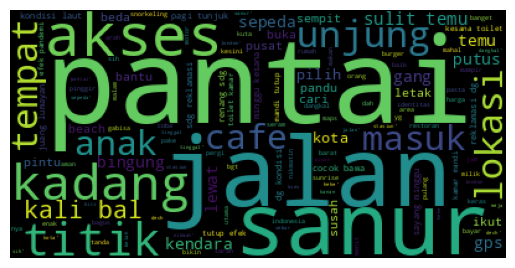

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df_access_negative))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [9]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_negatif = [tokenisasi(t) for t in teks_negatif]
print(tokens_negatif)

[['aman', 'jalan', 'aman', 'jalan'], ['temu', 'sanur', 'milik', 'identitas', 'jalan', 'utama', 'coba', 'keras', 'barat', 'kadang', 'kadang', 'pasta', 'burger', 'pilih', 'makan', 'indonesia', 'pilih', 'temu', 'mahal', 'bayar', 'harga', 'london', 'temu', 'sanur', 'milik', 'identitas', 'jalan', 'utama', 'coba', 'keras', 'barat', 'kadang', 'kadang', 'pasta', 'burger', 'pilih', 'makan', 'indonesia', 'pilih', 'temu', 'mahal', 'bayar', 'harga', 'london'], ['kali', 'bal', 'sulit', 'temu', 'letak', 'pantai', 'pagi', 'tunjuk', 'jalan', 'kadang', 'putus', 'titik', 'gps', 'bantu', 'kendara', 'sepeda', 'motor', 'arah', 'kuta', 'menit', 'pantai', 'sanur', 'kali', 'bal', 'sulit', 'temu', 'letak', 'pantai', 'pagi', 'tunjuk', 'jalan', 'kadang', 'putus', 'titik', 'gps', 'bantu', 'kali', 'bal', 'sulit', 'temu', 'letak', 'pantai', 'pagi', 'tunjuk', 'jalan', 'kadang', 'putus', 'titik', 'gps', 'bantu', 'kendara', 'sepeda', 'motor', 'arah', 'kuta', 'menit', 'pantai', 'sanur'], ['pergi', 'jam', 'jalan', 'snor

In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_negatif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_negatif]
# View
print(id2word)
print(corpus[:1])

Dictionary<120 unique tokens: ['aman', 'jalan', 'barat', 'bayar', 'burger']...>
[[(0, 2), (1, 2)]]


In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('aman', 2), ('jalan', 2)]]

In [12]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=5,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

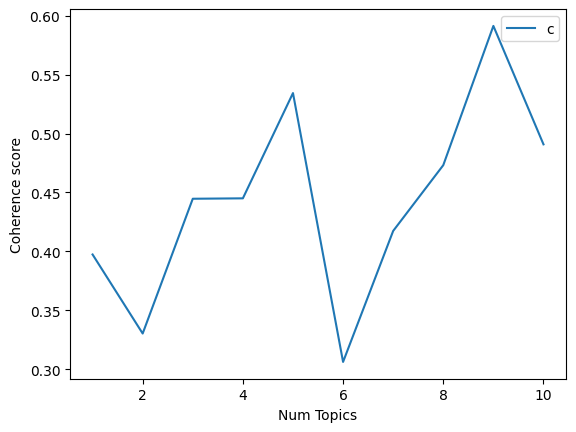

coherence_values:  [0.3973859422686042, 0.33030544329538336, 0.4446858303880681, 0.44503499460896, 0.5343644418230437, 0.30620941660431467, 0.4173811901286909, 0.47319771563633717, 0.591357215048516, 0.4908543837853154]


In [14]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_negatif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [15]:
lda_model.print_topics() #num_word default is 10
#lda_model.show_topics() #ini juga bisa

[(0,
  '0.059*"kadang" + 0.059*"temu" + 0.059*"pilih" + 0.033*"sanur" + 0.032*"jalan" + 0.031*"barat" + 0.031*"indonesia" + 0.031*"makan" + 0.031*"keras" + 0.031*"utama"'),
 (1,
  '0.097*"pantai" + 0.053*"temu" + 0.045*"sulit" + 0.045*"jalan" + 0.038*"sanur" + 0.024*"unjung" + 0.024*"juang" + 0.024*"lumayan" + 0.024*"lokasi" + 0.024*"pusat"'),
 (2,
  '0.070*"pantai" + 0.070*"jalan" + 0.060*"sanur" + 0.035*"sepeda" + 0.027*"titik" + 0.027*"lokasi" + 0.027*"masuk" + 0.027*"beda" + 0.027*"beach" + 0.027*"pintu"'),
 (3,
  '0.052*"cafe" + 0.052*"anak" + 0.027*"akses" + 0.027*"kendara" + 0.027*"sih" + 0.027*"mandi" + 0.027*"buka" + 0.027*"sayang" + 0.027*"tutup" + 0.027*"bawa"'),
 (4,
  '0.038*"gang" + 0.038*"tempat" + 0.038*"lewat" + 0.038*"pandu" + 0.038*"bal" + 0.038*"susah" + 0.038*"kali" + 0.038*"akses" + 0.038*"sdg" + 0.038*"laut"')]

In [16]:
print("Topic distribution for document :", " ".join(tokens_negatif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : aman jalan aman jalan
feature of each token: [('aman', 2), ('jalan', 2)]


[(0, 0.040216524),
 (1, 0.04037541),
 (2, 0.8394018),
 (3, 0.040002894),
 (4, 0.040003367)]

In [17]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)   # tambahkan indeks [0] pada variabel row

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_negatif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_access_negative.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-17-262378c4e1d5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-262378c4e1d5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-262378c4e1d5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-262378c4e1d5>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               2              0.8394   
1            1               0              0.9822   
2            2               1              0.9864   
3            3               2              0.9384   
4            4               1              0.9740   

                        Topic Keywords  \
0  pantai, jalan, sanur, sepeda, titik   
1    kadang, temu, pilih, sanur, jalan   
2    pantai, temu, sulit, jalan, sanur   
3  pantai, jalan, sanur, sepeda, titik   
4    pantai, temu, sulit, jalan, sanur   

                                                Text  
0                         [aman, jalan, aman, jalan]  
1  [temu, sanur, milik, identitas, jalan, utama, ...  
2  [kali, bal, sulit, temu, letak, pantai, pagi, ...  
3  [pergi, jam, jalan, snorkeling, orang, stasiun...  
4  [akses, pantai, sulit, temu, jalan, kses, pant...

In [18]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_negatif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5338365072989664


In [19]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.8778949135311249, 0.3044870923402564, 0.3789289732172464, 0.9959225810874399, 0.11194897631876422]


In [20]:
pip install pyLDAvis

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.16.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.


In [21]:
pip install pandas==1.5.3

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [22]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.145904 -0.010200       1        1  27.752014
3     -0.247352  0.031849       2        1  23.513714
2      0.103619  0.074300       3        1  22.604058
4     -0.006213 -0.200399       4        1  14.811750
0      0.004043  0.104450       5        1  11.318464, topic_info=        Term       Freq      Total Category  logprob  loglift
18      temu   9.000000   9.000000  Default  30.0000  30.0000
31    pantai  19.000000  19.000000  Default  29.0000  29.0000
9     kadang   5.000000   5.000000  Default  28.0000  28.0000
1      jalan  13.000000  13.000000  Default  27.0000  27.0000
16     pilih   3.000000   3.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
114  pandemi   0.178435   3.182564   Topic5  -5.5413  -0.7025
109     efek   0.177629   3.182551   Topic5  -5.5458  -0.7070
115   sayang   0.176532   3.183134   Topic5  -5.5520  -0.7134
31    pantai   0.227504  19.838231   Topic5  -5.2983  -2.2895
79    tempat   0.183442   5.328442   Topic5  -5.5136  -1.1902

[221 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
42        1  0.286197   akses
42        2  0.429296   akses
42        4  0.286197   akses
0         3  0.868500    aman
104       2  0.891353    anak
...     ...       ...     ...
119       2  0.942359   tutup
57        1  0.556395  unjung
57        4  0.370930  unjung
19        5  0.488218   utama
103       2  0.839749      yg

[145 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])